# Project Facial Emotion Classification

* [dataset](https://www.kaggle.com/datasets/msambare/fer2013?select=test)
* [poster](https://drive.google.com/file/d/1H7Xs9Qg2A0YlANd9Adka1IuK3MXEeKs5/view?usp=sharing)
* [video](https://drive.google.com/file/d/1hyjSEc0ZWQnh_-qf3tkXrod6A7GFAI5J/view?usp=sharing)

## Setup

First we need to import some necessary packages.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input, BatchNormalization
from tensorflow.keras.layers import\
    Conv2D, ZeroPadding2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.applications import ResNet50, ResNet50V2
from tensorflow.keras.optimizers import Adam, SGD
import os
import matplotlib.pyplot as plt

tf.random.set_seed(2266)
np.random.seed(1)
%matplotlib inline

Unzip the data from google drive and load out help functions.

In [3]:
if not (os.path.exists('test') and os.path.exists('train')):
    !unzip "/content/drive/MyDrive/data/emotions/archive.zip" -d "/content"

In [9]:
def getData(batch_size, val_split, path='data/'):
    train = keras.utils.image_dataset_from_directory(
        directory=path+'train/',
        labels='inferred',
        label_mode='categorical',
        batch_size=batch_size,
        image_size=(48, 48)
    )
    train = train.map(lambda X, y: (X / 255, y))

    test = keras.utils.image_dataset_from_directory(
        directory=path+'test/',
        labels='inferred',
        label_mode='categorical',
        batch_size=batch_size,
        image_size=(48, 48)
    )
    test = test.map(lambda X, y: (X / 255, y))

    total_size = train.cardinality().numpy()
    train_size = int((1 - val_split) * total_size)
    
    train = train.shuffle(batch_size)
    train_data = train.take(train_size)
    val_data = train.skip(train_size)
    return train_data, val_data, test

def plotHistory(history, model_name='Neural Network Training History'):
    fig, ax = plt.subplots(1,2,figsize = (16,4))
    ax[0].plot(history.history['loss'],color='#EFAEA4',label = 'Training Loss')
    ax[0].plot(history.history['val_loss'],color='#B2D7D0',label = 'Validation Loss')
    ax[1].plot(history.history['accuracy'],color='#EFAEA4',label = 'Training Accuracy')
    ax[1].plot(history.history['val_accuracy'],color='#B2D7D0',label = 'Validation Accuracy')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs');
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy %');
    fig.suptitle('NN_model Training', fontsize = 24)

load the data in batches of 32, split the train data 8:2 into validation set.
checkout 

In [10]:
train, val, test = getData(32, 0.2, path='data/')

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


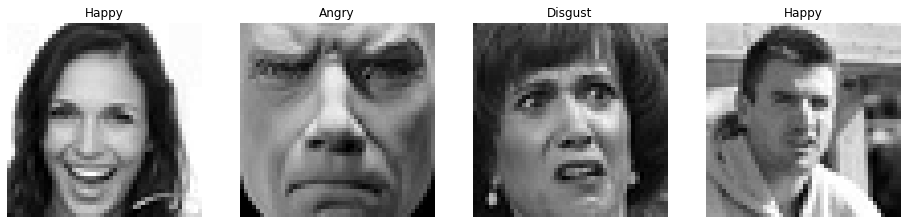

In [12]:
emo_dict = {
    0:'Angry', 1:'Disgust',  2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'
}
display_data = train.take(4)
fig, ax = plt.subplots(1, 4, figsize = (16,4))
for idx, data in enumerate(display_data):
    label = emo_dict[np.argmax(data[1][0])]
    img = data[0][0]
    ax[idx].imshow(img)
    ax[idx].set_title(label)
    ax[idx].axis('off')

In [6]:
resnet50 = ResNet50V2(weights='imagenet', include_top=False)
model = Sequential(name='ResNet50')
model.add(Input(shape=(48, 48, 3)))
model.add(keras.layers.Lambda(lambda img: tf.image.resize(img, (224, 224))))
model.add(resnet50)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer=SGD(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "ResNet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                          

Epoch 1/150
718/718 [==============================] - 129s 170ms/step - loss: 2.5564 - accuracy: 0.2261 - val_loss: 1.7134 - val_accuracy: 0.3689
Epoch 2/150
718/718 [==============================] - 122s 169ms/step - loss: 2.0494 - accuracy: 0.3325 - val_loss: 1.4750 - val_accuracy: 0.4662
Epoch 3/150
718/718 [==============================] - 122s 169ms/step - loss: 1.7801 - accuracy: 0.3988 - val_loss: 1.3638 - val_accuracy: 0.4912
Epoch 4/150
718/718 [==============================] - 122s 169ms/step - loss: 1.6269 - accuracy: 0.4359 - val_loss: 1.4193 - val_accuracy: 0.5144
Epoch 5/150
718/718 [==============================] - 121s 169ms/step - loss: 1.5207 - accuracy: 0.4604 - val_loss: 1.2930 - val_accuracy: 0.5351
Epoch 6/150
718/718 [==============================] - 122s 169ms/step - loss: 1.4184 - accuracy: 0.4863 - val_loss: 1.2446 - val_accuracy: 0.5454
Epoch 7/150
718/718 [==============================] - 122s 169ms/step - loss: 1.3280 - accuracy: 0.5205 - val_loss: 1

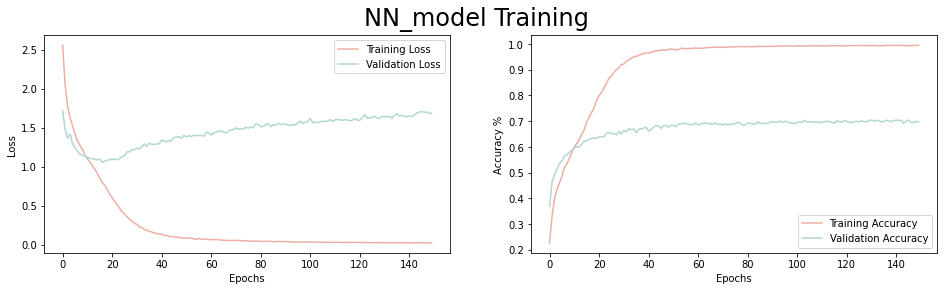

In [7]:
history = model.fit(train, validation_data=val, verbose=1, epochs=150)
plotHistory(history, model_name='ResNet50')

The following 'ResNet50' model is the exact architecture in the [ResNet paper](https://arxiv.org/abs/1512.03385).
See the design in **Table 1** 50-layer column.

In [8]:
test_acc = model.evaluate(test)[1]
test_acc

225/225 [==============================] - 12s 53ms/step - loss: 2.0889 - accuracy: 0.6276


0.6276121735572815

In [9]:
model.save('weights')

INFO:tensorflow:Assets written to: drive/MyDrive/CK_Res50/assets
